In [1]:
%run Model.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.605894736842117
Uptake: -10.0
Yield for model SucD = 0.9605894736842118
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.708085106382972
Uptake: -10.0
Yield for model Akg = 0.9708085106382972


# Biomass growth

## Substrate: glucose

The biomass growth of the sucd model is calculated with substrate glucose

In [2]:
# model:sucd
medium = model_sucd.medium
with model_sucd:
    medium['EX_glc__D_e'] = 10
  
    model_sucd.medium = medium
    solution = model_sucd.optimize()
    print(solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.8769972144269966


The biomass growth of the akg model is calculated with substrate glucose

In [3]:
# model:akg
medium1 = model_akg.medium
with model_akg:
    medium1['EX_glc__D_e'] = 10
 
    model_akg.medium = medium
    solution2 = model_akg.optimize()
    print(solution2.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.8769972144269819


## 1,4-BDO production in Anaerobic conditions

The 1,4-BDO production of the sucd model is calculated under anaerobic conditions and in different oxygen flows with a glucose substrate. The calculation takes place by introducing a loop that will try different values of oxygen flows including its abesnce.


In [23]:
for i in range(0,1020,20):

    with model_sucd:
        medium = model_sucd.medium
        medium['EX_glc__D_e']=10
        medium['EX_xyl__D_e']=0
        medium['EX_o2_e'] = i  
        model_sucd.medium = medium
        with model_sucd:
            model_sucd.objective = model_sucd.reactions.EX_bdo
            BDO_production = model_sucd.optimize().objective_value

            print(BDO_production)


6.192761904761964
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096
9.605894736842096


It can be noticed that there is a production of 1,4-BDO in anaerobic conditions around 6.192. However, with the precence of oxygen, the 1,4-BDO production increases and remains stable at 9.061

The same process is followed for the calculation of 1,4-BDO production of akg model under anaerobic conditions with a glucose substrate and in different oxygen flows.

In [22]:
for i in range(0,1020,20):
    with model_akg:
        medium = model_akg.medium
        medium['EX_glc__D_e']=10
        medium['EX_xyl__D_e']=0
        medium['EX_o2_e'] =i    
        model_akg.medium = medium
        with model_akg:
            model_akg.objective = model_akg.reactions.EX_bdo
            BDO_production = model_akg.optimize().objective_value

    print(BDO_production)

4.268235294117585
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978
9.708085106382978


The same observations can be deducted for the akg model. Without oxygen the 1,4-BDO production is lower around 4.268. Furthermore, it has to be noted that under anaerobic conditions the sucd model produces more 1,4- BDO than akg around 9.708.

## Looping through the carbons Sources

### Model Sucd

In [7]:

# A loop is created that will check the max growth and the 1,4-BDO production for the different carbon sources
#Firstly, the lists which will include the reactions id, the reactions and metabolite names, the metabolites id and the MW are created :

reaction_id=[]
reaction_names=[]
carbon_name=[]
carbon_id=[]
MW=[]
for reaction in model_sucd.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id.append(reaction.id)
            reaction_names.append(reaction.name) 
            carbon_name.append(metabolite.name)
            carbon_id.append(metabolite.id)
            MW.append(metabolite.formula_weight)
# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_sucd:
    max_base_growth = model_sucd.slim_optimize()
    model_sucd.objective = model_sucd.reactions.EX_bdo
    max_base_production = model_sucd.slim_optimize()



 
 # Now, we will loop through every carbon source in the model and observe the production of 1,4-BDO.     
# We define the lists we are going to use
max_growth = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production = [] #All the values of the bdo production for the different carbon sources   
medium=model_sucd.medium

with model_sucd:
    for reaction in reaction_id:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=10
        # It is very important to notice that the loop for every carbon source will take place with the concentration being equal to 10
        model_sucd.medium = medium
        with model_sucd:
            max_growth.append(model_sucd.slim_optimize(error_value=0.))
            model_sucd.objective = model_sucd.reactions.EX_bdo
            max_production.append(model_sucd.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        





The lists above have been created and they include information about reactions names, metabolites names, metabolites ID, max growth for each metabolite, the 1,4-BDO production and the molecular weight of each metabolite. This information are important so that comparisons between differents substrates to be made.
Subsequently, another list is created in order to save the yield values. The values are convented into yields measured in (g of 1,4-BDO/ g of carbon sourse)




In [8]:

Yield= []
for i in range(len(MW)) :
    Yield.append((max_production[i]*90.14)/(10*MW[i]))
   
  

Printing the table with the results descendigly from higher yield to lower. Also, the metabolites that give zero growth are not being shown.

In [19]:
CARBON1 = {'Reaction_name': reaction_names,
             'Reaction_ID': reaction_id,
             'Carbon_Metabolite_Name': carbon_name,
              'Carbon_Metabolite_ID': carbon_id,
            'Max_growth':max_growth,
           'Max_BDO_production': max_production,
          'MW' : MW,
          'Yield':Yield}
df1 = pd.DataFrame(CARBON1, columns = ['Carbon_Metabolite_Name','Max_growth', 'Carbon_Metabolite_Name','Max_BDO_production','Carbon_Metabolite_Name' ,'Yield'])

df1= df1[df1['Max_growth'] != 0] 
df1=df1.sort_values(by='Yield', ascending=False).head(80) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df1)


                                Carbon_Metabolite_Name  Max_growth  \
108                            Octadecenoate (n-C18:1)    2.665123   
65                             Hexadecenoate (n-C16:1)    2.359259   
101                            Octadecanoate (n-C18:0)    2.629139   
194                                 Phenylacetaldehyde    1.082558   
67                            Tetradecenoate (n-C14:1)    2.053394   
171                            Hexadecanoate (n-C16:0)    2.323275   
228                                     Phenethylamine    1.082558   
84                            Tetradecanoate (n-C14:0)    2.017410   
185                              Dodecanoate (n-C12:0)    1.711546   
192                                            Ethanol    0.372087   
119                                Decanoate (n-C10:0)    1.405681   
36                                          Putrescine    0.690567   
269                                           Propanal    0.446102   
198                 

#### The 20 compounds with the best yield are being presented in the following table

In [32]:

df1a = pd.DataFrame(CARBON1, columns = ['Carbon_Metabolite_Name','Yield','Max_growth', 'Max_BDO_production' ])

df1a= df1a[df1a['Max_growth'] != 0] 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    df1a=df1a.sort_values(by='Yield', ascending=False).head(20) 
    print(df1a)


             Carbon_Metabolite_Name     Yield  Max_growth  Max_BDO_production
108         Octadecenoate (n-C18:1)  0.938063    2.665123           29.290105
65          Hexadecenoate (n-C16:1)  0.922091    2.359259           25.921684
101         Octadecanoate (n-C18:0)  0.918003    2.629139           28.869053
194              Phenylacetaldehyde  0.910205    1.082558           12.132211
67         Tetradecenoate (n-C14:1)  0.902142    2.053394           22.553263
171         Hexadecanoate (n-C16:0)  0.899954    2.323275           25.500632
228                  Phenethylamine  0.895015    1.082558           12.132211
84         Tetradecanoate (n-C14:0)  0.877450    2.017410           22.132211
185           Dodecanoate (n-C12:0)  0.848612    1.711546           18.763789
192                         Ethanol  0.829127    0.372087            4.237474
119             Decanoate (n-C10:0)  0.810327    1.405681           15.395368
36                       Putrescine  0.782795    0.690567       

Firstly, the 1,4-BDO production should not be an indicator for the selection of the best substrate because bigger molecules with more carbon atoms produce more 1,4-BDO. It can be observed that alkanoates such as (Octadecenoate, Hexadecenoate, Tetradecenoate Hexadecenoate etc) and give higher yields and and high 1,4-BDO production.  However, there is no reference in the literature of using them as substrates for E. coli. However, there is no reference in the literature of using them as substrates for E. coli. Phenylacthylacetaldehyde, phenethylamine, ethanol, propanal and acetaldehyde seem to have good yields and also appear in the literature as substrates for other processes thus, they could be possible substrates of the sucd medium. Considering the prices, the availability and the research that has already be done, ethanol could be one of the best options.

### A graph with 1,4-BDO production as a function of growth for the different carbon sourse but in the same concentration for Sucd model

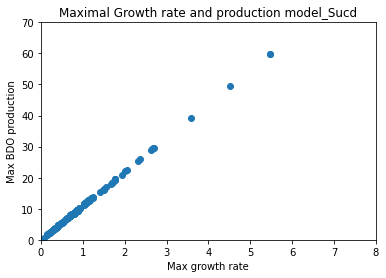

In [10]:


plt.scatter(df1.get('Max_growth'), df1.get('Max_BDO_production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 70)
plt.title('Maximal Growth rate and production model_Sucd')

plt.show()

This graph represents the 1.4-BDO production as a function of the growth rate. Each point is a different carbon source. At this point their relation is linear. However, it has to be mentioned the the flux of every carbon source is stable at the value of 10, with higher values the graph varies and the relation cease to be linear. 

## Model akg

Exactly the same process is being followed for the akg model

In [35]:

# A loop is created that will check the max growth and the 1,4-BDO production for the different carbon sources
#Firstly, the lists which will include the reactions id, the reactions and metabolite names, the metabolites id and the MW are created :

reaction_id2=[]
reaction_names2=[]
carbon_name2=[]
carbon_id2=[]
MW2=[]
for reaction in model_akg.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id2.append(reaction.id)
            reaction_names2.append(reaction.name) 
            carbon_name2.append(metabolite.name)
            carbon_id2.append(metabolite.id)
            MW2.append(metabolite.formula_weight)
# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_akg:
    max_base_growth2 = model_akg.slim_optimize()
    model_akg.objective = model_akg.reactions.EX_bdo
    max_base_production2 = model_akg.slim_optimize()



 
 # Now, we will loop through every carbon source in the model and observe the production of BDO.     
# We define the lists we are going to use
max_growth2 = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production2 = [] #All the values of the bdo production for the different carbon sources   
medium2=model_akg.medium

with model_akg:
    for reaction in reaction_id:
        medium2['EX_glc__D_e'] = 0
        medium2[reaction]=10
        # It is very important to notice that the loop for every carbon source will take place with the concentration being equal to 10
        model_akg.medium = medium2
        with model_akg:
            max_growth2.append(model_akg.slim_optimize(error_value=0.))
            model_akg.objective = model_akg.reactions.EX_bdo
            max_production2.append(model_akg.slim_optimize(error_value=0.))  # Determining max production
        medium2[reaction]=0        





In [37]:

Yield2= []
for i in range(len(MW2)) :
    Yield2.append((max_production2[i]*90.14)/(10*MW2[i]))
   
  

#### Presenting the results descendingly

In [38]:
CARBON2 = {'Reaction_name2': reaction_names2,
             'Reaction_ID2': reaction_id2,
             'Carbon_Metabolite_Name2': carbon_name2,
              'Carbon_Metabolite_ID2': carbon_id2,
            'Max_growth2':max_growth2,
           'Max_BDO_production2': max_production2,
          'MW2' : MW2,
          'Yield2':Yield2}
df2 = pd.DataFrame(CARBON2, columns = ['Carbon_Metabolite_Name2','Max_growth2','Carbon_Metabolite_Name2', 'Max_BDO_production2','Carbon_Metabolite_Name2','Yield2'])

df2= df2[df2['Max_growth2'] != 0] 
df2=df2.sort_values(by='Yield2', ascending=False).head(200) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df2)


                               Carbon_Metabolite_Name2   Max_growth2  \
108                            Octadecenoate (n-C18:1)  2.960170e+01   
65                             Hexadecenoate (n-C16:1)  2.619745e+01   
101                            Octadecanoate (n-C18:0)  2.917617e+01   
194                                 Phenylacetaldehyde  1.226128e+01   
67                            Tetradecenoate (n-C14:1)  2.279319e+01   
171                            Hexadecanoate (n-C16:0)  2.577191e+01   
228                                     Phenethylamine  1.226128e+01   
84                            Tetradecanoate (n-C14:0)  2.236766e+01   
185                              Dodecanoate (n-C12:0)  1.896340e+01   
119                                Decanoate (n-C10:0)  1.555915e+01   
192                                            Ethanol  4.175094e+00   
198                                   Phenylpropanoate  1.279319e+01   
121                                 Octanoate (n-C8:0)  1.215489

#### The 20 compounds with the best yield are being presented in the following table

In [41]:

df2a = pd.DataFrame(CARBON2, columns = ['Carbon_Metabolite_Name2','Yield2','Max_growth2', 'Max_BDO_production2' ])

df2a= df2a[df2a['Max_growth2'] != 0] 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    df2a=df2a.sort_values(by='Yield2', ascending=False).head(20) 
    print(df2a)


            Carbon_Metabolite_Name2    Yield2  Max_growth2  \
108         Octadecenoate (n-C18:1)  0.948042    29.601702   
65          Hexadecenoate (n-C16:1)  0.931900    26.197447   
101         Octadecanoate (n-C18:0)  0.927769    29.176170   
194              Phenylacetaldehyde  0.919888    12.261277   
67         Tetradecenoate (n-C14:1)  0.911739    22.793191   
171         Hexadecanoate (n-C16:0)  0.909528    25.771915   
228                  Phenethylamine  0.904537    12.261277   
84         Tetradecanoate (n-C14:0)  0.886785    22.367660   
185           Dodecanoate (n-C12:0)  0.857640    18.963404   
119             Decanoate (n-C10:0)  0.818947    15.559149   
192                         Ethanol  0.816922     4.175094   
198                Phenylpropanoate  0.773081    12.793191   
121              Octanoate (n-C8:0)  0.765095    12.154894   
269                        Propanal  0.750475     4.835472   
36                       Putrescine  0.722251     7.224706   
61      

Firslty, the 1,4-BDO production should not be an indicator for the selection of the best substrate because bigger molecules with more carbon atoms produce more 1,4-BDO. It can be observed that alkanoates such as (Octadecenoate, Hexadecenoate, Tetradecenoate Hexadecenoate etc) and give higher yields and and high 1,4-BDO production. However, there is no reference in the literature of using them as substrates for E. coli. However, there is no reference in the literature of using them as substrates for E. coli. Phenylacthylacetaldehyde, phenethylamine, ethanol, propanal and acetaldehyde seem to have good yields and also appear in the literature as substrates for other processes thus, they could be possible substrates of the sucd medium. Considering the prices, the availability and the research that has already be done, ethanol could be one of the best options.

### A graph with 1,4-BDO production as a function of growth for the different carbon sourse but in the same concentration for akg model

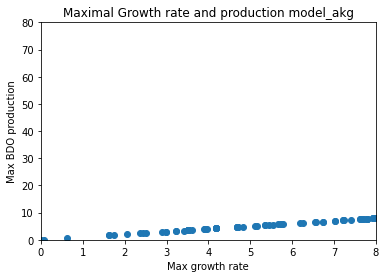

In [14]:


plt.scatter(df2.get('Max_growth2'), df2.get('Max_BDO_production2'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 80)
plt.title('Maximal Growth rate and production model_akg')

plt.show()

Similar results can be noticed at the akg graph. This graph represents the 1.4-BDO production as a function of the growth rate. Each point is a different carbon source. At this point their relation is linear. However, it has to be mentioned the the flux of every carbon source is stable at the value of 10, with higher values the graph varies and the relation cease to be linear. 